In [16]:
!unzip '/content/drive/My Drive/amazon-music-reviews.zip'

Archive:  /content/drive/My Drive/amazon-music-reviews.zip
  inflating: Musical_Instruments_5.json  
  inflating: Musical_instruments_reviews.csv  


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
 Musical_Instruments_5.json
 Musical_instruments_reviews.csv

In [3]:
df=pd.read_csv('/content/drive/My Drive/Musical_instruments_reviews.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [4]:
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,10261.0,4.488744e+00,8.946424e-01,1.000000e+00,4.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
unixReviewTime,10261.0,1.360606e+09,3.779735e+07,1.095466e+09,1.343434e+09,1.368490e+09,1.388966e+09,1.405987e+09


In [0]:
df.reviewText.fillna("",inplace = True)
df=df.drop(['reviewerID','asin','reviewerName','helpful','unixReviewTime','reviewTime'],1)

In [8]:
df['text'] = df['reviewText'] + ' ' + df['summary']
# del df['reviewText']
# del df['summary']
df.head()

,reviewText,overall,summary,text
0,"Not much to write about here, but it does exac...",5.0,good,"Not much to write about here, but it does exac..."
1,The product does exactly as it should and is q...,5.0,Jake,The product does exactly as it should and is q...
2,The primary job of this device is to block the...,5.0,It Does The Job Well,The primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,Nice windscreen protects my MXL mic and preven...
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,This pop filter is great. It looks and perform...


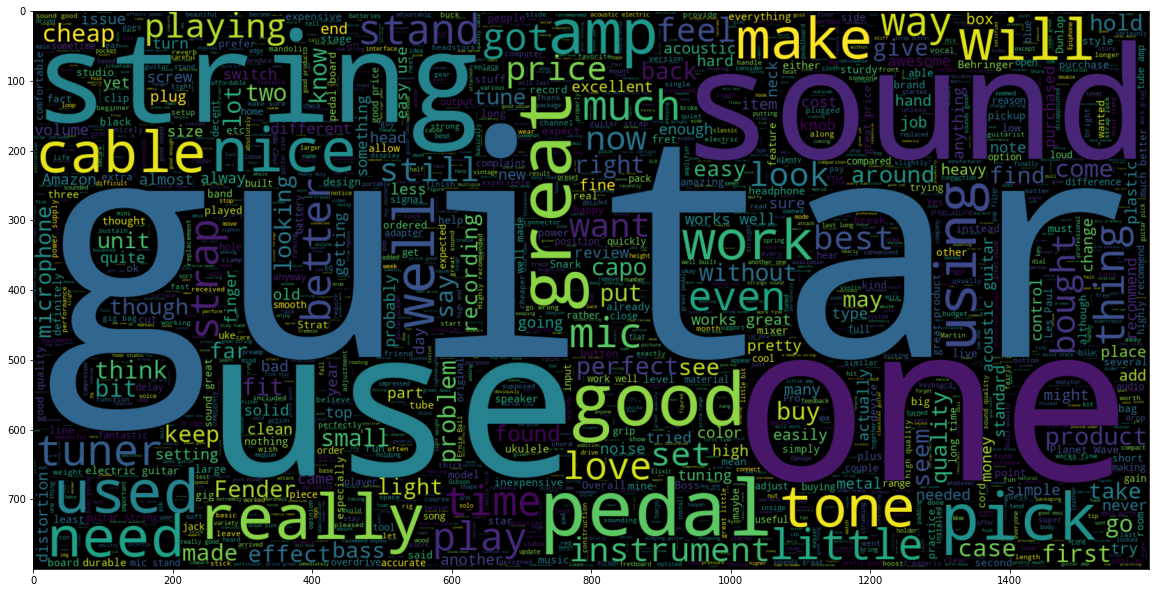

In [9]:
plt.figure(figsize = (20,20)) # Text Reviews with Poor Ratings
wc = WordCloud(min_font_size = 3,  max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df.text))
plt.imshow(wc,interpolation = 'bilinear')

Text(0.5, 1.0, 'movie reviews')

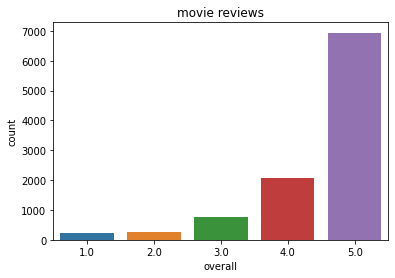

In [10]:
sns.countplot(df.overall).set_title('movie reviews')

In [27]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

--2020-04-29 17:47:49--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-04-29 17:47:50--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-04-29 17:47:50--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [28]:
!unzip glove*.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       
drive  sample_data


In [0]:
glove_path='/content/drive/My Drive/glove.6B.100d.txt'

In [12]:
EMBEDDING_DIM = 100

embeddings_index = {}
f = open(glove_path)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

#print('Found %s unique tokens.' % len(word_index))
print('Total %s word vectors.' % len(embeddings_index))

Total 400000 word vectors.


In [1]:
import keras
from keras import backend as K
from keras.engine.topology import Layer
from tensorflow.python.keras.layers import *
from tensorflow.python.keras.models import Sequential, Model, load_model
from keras.callbacks import ModelCheckpoint
from keras.initializers import Constant
from keras.layers.merge import add

from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.utils import np_utils
from keras import regularizers
from keras.regularizers import l2

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
import os

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [14]:
df.head()

,reviewText,overall,summary,text
0,"Not much to write about here, but it does exac...",5.0,good,"Not much to write about here, but it does exac..."
1,The product does exactly as it should and is q...,5.0,Jake,The product does exactly as it should and is q...
2,The primary job of this device is to block the...,5.0,It Does The Job Well,The primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,Nice windscreen protects my MXL mic and preven...
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,This pop filter is great. It looks and perform...


In [15]:
sw=[]
sw=df['text']
sw

0        Not much to write about here, but it does exac...
1        The product does exactly as it should and is q...
2        The primary job of this device is to block the...
3        Nice windscreen protects my MXL mic and preven...
4        This pop filter is great. It looks and perform...
                               ...                        
10256    Great, just as expected.  Thank to all. Five S...
10257    I've been thinking about trying the Nanoweb st...
10258    I have tried coated strings in the past ( incl...
10259    Well, MADE by Elixir and DEVELOPED with Taylor...
10260    These strings are really quite good, but I wou...
Name: text, Length: 10261, dtype: object

In [0]:
stop_words = set(stopwords.words('english'))
ws=[]
for example_sent in sw:
  word_tokens = word_tokenize(example_sent) 
  filtered_sentence = [w for w in word_tokens if not w in stop_words]
  ws.append(filtered_sentence)

In [18]:
ws[1]

['The',
 'product',
 'exactly',
 'quite',
 'affordable.I',
 'realized',
 'double',
 'screened',
 'arrived',
 ',',
 'even',
 'better',
 'I',
 'expected.As',
 'added',
 'bonus',
 ',',
 'one',
 'screens',
 'carries',
 'small',
 'hint',
 'smell',
 'old',
 'grape',
 'candy',
 'I',
 'used',
 'buy',
 ',',
 'reminiscent',
 "'s",
 'sake',
 ',',
 'I',
 'stop',
 'putting',
 'pop',
 'filter',
 'next',
 'nose',
 'smelling',
 'recording',
 '.',
 ':',
 'DIf',
 'needed',
 'pop',
 'filter',
 ',',
 'work',
 'well',
 'expensive',
 'ones',
 ',',
 'may',
 'even',
 'come',
 'pleasing',
 'aroma',
 'like',
 'mine',
 '!',
 'Buy',
 'product',
 '!',
 ':',
 ']',
 'Jake']

In [0]:
for i in range(len(ws)):
  ws[i]= [word for word in ws[i] if word.isalpha()]

In [0]:
lemma=WordNetLemmatizer()
for i in range(len(ws)):
  for j in range(len(ws[i])):
    ws[i][j]=lemma.lemmatize(ws[i][j]) 

In [22]:
# tokenizing
df['text']=ws
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.text)
X = tokenizer.texts_to_sequences(df.text)
df['words'] = X

# delete some empty and short data
df['word_length'] = df.words.apply(lambda i: len(i))
df = df[df.word_length >= 5]

df.head()

,reviewText,overall,summary,text,words,word_length
0,"Not much to write about here, but it does exac...",5.0,good,"[Not, much, write, exactly, supposed, filter, ...","[106, 24, 1591, 302, 550, 469, 417, 8, 131, 24...",25
1,The product does exactly as it should and is q...,5.0,Jake,"[The, product, exactly, quite, realized, doubl...","[4, 38, 302, 166, 1515, 756, 7493, 538, 46, 32...",54
2,The primary job of this device is to block the...,5.0,It Does The Job Well,"[The, primary, job, device, block, breath, wou...","[4, 1592, 116, 281, 1185, 3809, 18, 776, 672, ...",52
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,"[Nice, windscreen, protects, MXL, mic, prevent...","[23, 1560, 2036, 1344, 43, 3455, 417, 695, 39,...",26
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,"[This, pop, filter, great, It, look, performs,...","[15, 417, 469, 3, 9, 54, 1665, 10, 201, 469, 4...",23


In [0]:
maxlen = 50
X = list(sequence.pad_sequences(df.words, maxlen=maxlen))

In [0]:
word_index = tokenizer.word_index

In [0]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_layer = Embedding(len(word_index)+1,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=maxlen,
                            trainable=False)

In [0]:
X = np.array(X)
Y = np_utils.to_categorical(list(df.overall))

seed = 29
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=seed)

In [31]:
inp = Input(shape=(maxlen,), dtype='int32')
x = embedding_layer(inp)
x = Bidirectional(LSTM(128, return_sequences=True, name="BiLSTM-1",recurrent_regularizer=l2(0.01)))(x)
x = Dropout(0.5, name="Dropout-1")(x)
x = Bidirectional(LSTM(128, name="BiLSTM-2",recurrent_regularizer=l2(0.01)))(x)
x = Dropout(0.5, name="Dropout-2")(x)
outp = Dense(6, activation='softmax', name="FC-layer")(x)
model = Model(inp, outp)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 100)           1724700   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 256)           234496    
_________________________________________________________________
Dropout-1 (Dropout)          (None, 50, 256)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               394240    
_________________________________________________________________
Dropout-2 (Dropout)          (None, 256)               0         
_________________________________________________________________
FC-layer (Dense)             (None, 6)                 1542

In [32]:
model_history = model.fit(x_train, y_train, batch_size=128, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
64/64 [==============================] - 3s 41ms/step - loss: 3.1893 - acc: 0.6632 - val_loss: 1.4927 - val_acc: 0.6787
Epoch 2/15
64/64 [==============================] - 1s 23ms/step - loss: 1.1636 - acc: 0.6730 - val_loss: 0.9420 - val_acc: 0.6807
Epoch 3/15
64/64 [==============================] - 1s 23ms/step - loss: 0.9144 - acc: 0.6791 - val_loss: 0.8678 - val_acc: 0.6802
Epoch 4/15
64/64 [==============================] - 1s 23ms/step - loss: 0.8547 - acc: 0.6809 - val_loss: 0.8441 - val_acc: 0.6831
Epoch 5/15
64/64 [==============================] - 1s 23ms/step - loss: 0.8302 - acc: 0.6889 - val_loss: 0.8161 - val_acc: 0.6880
Epoch 6/15
64/64 [==============================] - 1s 23ms/step - loss: 0.8076 - acc: 0.6931 - val_loss: 0.8305 - val_acc: 0.6641
Epoch 7/15
64/64 [==============================] - 1s 23ms/step - loss: 0.7876 - acc: 0.6941 - val_loss: 0.8087 - val_acc: 0.6895
Epoch 8/15
64/64 [==============================] - 1s 23ms/step - loss: 0.7702 - a

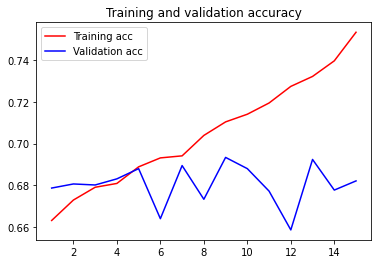

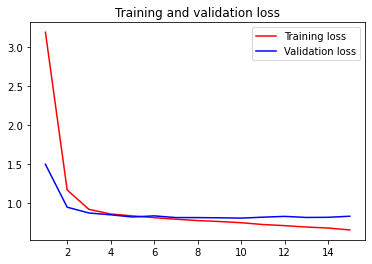

In [33]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
val_acc1=max(val_acc)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()
plt.show()

In [0]:
data=pd.read_csv('/content/drive/My Drive/Musical_instruments_reviews.csv')

In [0]:
data.text.fillna("",inplace = True)
data['text'] = data['reviewText'] + ' ' + data['summary']

In [0]:
x_train,x_test,y_train,y_test = train_test_split(data.text,data.overall,test_size = 0.2 , random_state = 0)

In [71]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (8208, 651092)
BOW_cv_test: (2053, 651092)


In [50]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(x_train)
#transformed test reviews
tv_test_reviews=tv.transform(x_test)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (8208, 651092)
Tfidf_test: (2053, 651092)


In [51]:
tv_train_reviews

<8208x651092 sparse matrix of type '<class 'numpy.float64'>'
	with 651092 stored elements in Compressed Sparse Row format>

In [52]:
cv_train_reviews

<8208x651092 sparse matrix of type '<class 'numpy.int64'>'
	with 651092 stored elements in Compressed Sparse Row format>

In [56]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=0)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,y_train)
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,y_train)
print(lr_tfidf)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [57]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
#Accuracy score for bag of words
lr_bow_score=accuracy_score(y_test,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(y_test,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.671699951290794
lr_tfidf_score : 0.6692644909887969


In [58]:
#training the model
mnb=MultinomialNB()
#fitting the nb for bag of words
mnb_bow=mnb.fit(cv_train_reviews,y_train)
print(mnb_bow)
#fitting the nb for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,y_train)
print(mnb_tfidf)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


In [59]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(y_test,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(y_test,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.6721870433511934
mnb_tfidf_score : 0.6692644909887969


In [0]:
model1 = Sequential()
model1.add(Dense(units = 75 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model1.add(Dense(units = 50 , activation = 'relu'))
model1.add(Dense(units = 25 , activation = 'relu'))
model1.add(Dense(units = 10 , activation = 'relu')) 
model1.add(Dense(units = 1 , activation = 'sigmoid'))
model1.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [123]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 75)                48831975  
_________________________________________________________________
dense_16 (Dense)             (None, 50)                3800      
_________________________________________________________________
dense_17 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                260       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 48,837,321
Trainable params: 48,837,321
Non-trainable params: 0
_________________________________________________________________


In [124]:
model1.train_on_batch(cv_train_reviews,y_train)

[0.6760793328285217, 0.02156432718038559]

In [0]:
cnn_test_accuracy=model1.test_on_batch(cv_test_reviews,y_test)

In [126]:
cnn_test_accuracy

[0.6395044326782227, 0.0189965907484293]

In [140]:
acc=dict({'LSTM':val_acc1,'CNN':cnn_test_accuracy[0],'LR-TF_IDF':lr_tfidf_score,'LR-BOW':lr_bow_score,'MNB-TF_IDF':mnb_tfidf_score,'MNB-BOW':mnb_bow_score})
acc

{'CNN': 0.6395044326782227,
 'LR-BOW': 0.671699951290794,
 'LR-TF_IDF': 0.6692644909887969,
 'LSTM': 0.693359375,
 'MNB-BOW': 0.6721870433511934,
 'MNB-TF_IDF': 0.6692644909887969}

Text(0.5, 1.0, 'Validation_accuracy')

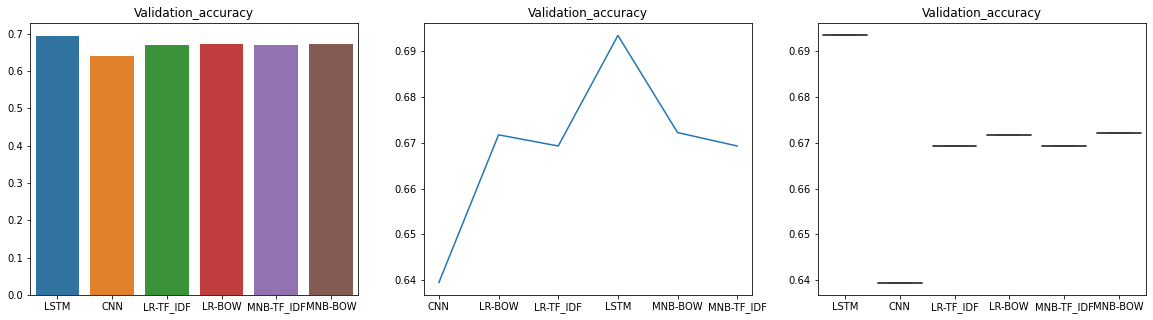

In [192]:
fig = plt.figure(figsize=(20,5))

#  subplot #1
fig.add_subplot(1,3,1)
sns.barplot(x=[*acc],y=list(acc.values())).set_title('Validation_accuracy')

#  subplot #2
fig.add_subplot(1,3,2)
sns.lineplot(x=[*acc],y=list(acc.values())).set_title('Validation_accuracy')

#  subplot #3
fig.add_subplot(1,3,3)
sns.boxplot(x=[*acc],y=list(acc.values())).set_title('Validation_accuracy')
